In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy
entropy_fix = np.log2(np.e)

# Figure 1 - Heatmap for MORI

In [1]:
def running_mean(x, N=5):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
month_table = pd.read_csv('MORI-MII/MORI-month_table.csv', index_col=0)

In [4]:
"""
df = month_table.filter(selected_keys+['year'])

df.Def.plot()
plt.show()

print(df[ df.year == 2001 ].Def)


df[ df.year.isin([1990,1991]) ].Def.plot()
plt.show()

print(df[ df.year.isin([1990,1991]) ].Def)

df[ df.year <= 2008 ].Eco.plot()
df[ df.year >= 2008 ].Eco.plot()
plt.show()

print(df[ df.year == 2008 ].Eco)
"""

"\ndf = month_table.filter(selected_keys+['year'])\n\ndf.Def.plot()\nplt.show()\n\nprint(df[ df.year == 2001 ].Def)\n\n\ndf[ df.year.isin([1990,1991]) ].Def.plot()\nplt.show()\n\nprint(df[ df.year.isin([1990,1991]) ].Def)\n\ndf[ df.year <= 2008 ].Eco.plot()\ndf[ df.year >= 2008 ].Eco.plot()\nplt.show()\n\nprint(df[ df.year == 2008 ].Eco)\n"

In [5]:
# make the moving average month table
N = 7

new_df_dic = {}
for key in month_table.keys()[:-3]:
    new_df_dic[key] = running_mean(month_table[key].values, N=N)

new_df_dic['month'] = month_table['month'].values[int((N-1)/2):-int((N-1)/2)]
new_df_dic['year']  = month_table['year'].values[int((N-1)/2):-int((N-1)/2)]

table_moving_average = pd.DataFrame(new_df_dic)

In [6]:
MII_names = {
            'Une' : 'Unemployment',
            'NHS' : 'National Health Service',
            'Eco' : 'Economy',
            'Cri' : 'Crime/Violence', 
            'Edu' : 'Education',
            'Rac' : 'Race Relations/Immigration',
            'Def' : 'Defence/Terrorism',
            'Com' : 'Common Market/EU/Europe',
            'Pen' : 'Pensions/Social Security',
            'Hou' : 'Housing',
            'Inf' : 'Inflation/Prices', 
            'Pol' : 'Pollution/Environment', 
            'Pov' : 'Poverty/Inequality', 
            'Nuc' : 'Nuclear War/Disarmament', 
            'LG'  : 'Local Government', 
            'Dru' : 'Drug Abuse', 
            'Tax' : 'Taxation', 
            'Mor' : 'Morality/Individual Behaviour'
            }

In [7]:
table = table_moving_average

M = table.as_matrix()[:,:-2]

# Special hack: add 'Imm'(Immigration) to 'Rac'(Race Relations/Immigration)
M[:,39] += M[:,19]

normM = []
for m in M:
    if sum(m)>0:
        normM += [ list(m/sum(m)) ]
    else:
        normM += [ list(m) ]
normM = np.array(normM)

Mshow = np.flipud(normM.T)
Mshow[Mshow==0.0] = -1

keys = month_table.keys()[:-3]
selected_keys = ['Une', 'NHS', 'Eco', 'Cri', 'Edu', 'Rac', 'Def', 'Com', 'Pen', 'Hou', \
       'Inf', 'Pol', 'Pov', 'Nuc', 'LG', 'Dru', 'Tax', 'Mor']
selected_indices = np.array([ np.where(keys[::-1]==k)[0][0] for k in selected_keys ])

Mshow = np.flipud(Mshow[selected_indices])

/home/chico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


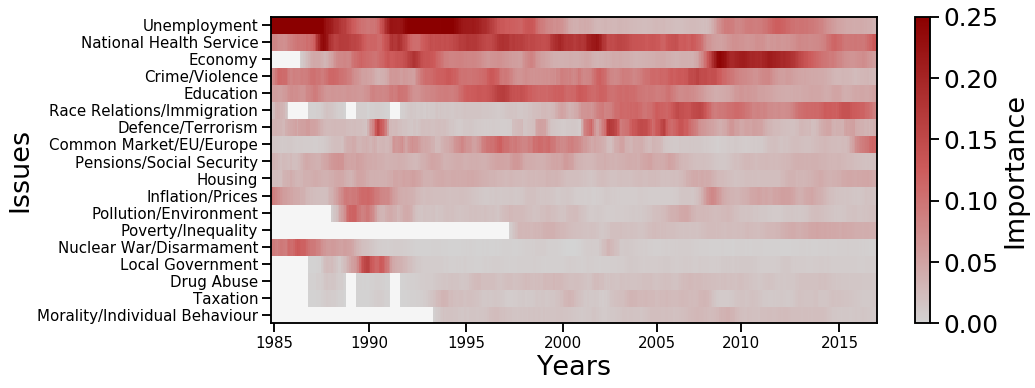

In [14]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

#color_zero = 'maroon'
color_zero = 'whitesmoke'

#cmap = 'RdYlBu'
#cmap = 'coolwarm'
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgrey","indianred","darkred"])
color_threshold = 0.25

# Trying to get colours like: https://nickobradovich.com/wp-content/uploads/2018/08/regulation.png

fig, ax = plt.subplots(1, figsize=(15,6))
pc = plt.pcolor(Mshow, cmap=cmap)

pc.cmap.set_under(color_zero)
pc.set_clim(0,color_threshold)

c = plt.colorbar()
c.set_label('Importance')

yticks = np.arange(len(keys.values[selected_indices]))+0.5
yticklabels = list(keys.values[::-1][selected_indices])
yticklabels = [ MII_names[key] for key in yticklabels ][::-1]

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=15)
ax.set_ylabel('Issues')

x = np.arange(len(table))
xticklabels = [ m.replace('-',' ') for m in table.month if m[:3]=='Jun' and int(m[-1])%5==0 ]
xticklabels = [ m.replace('Jun ','19') if int(m[4])>=8 else m.replace('Jun ','20') for m in xticklabels ]
xticks = [ x[int(i)] for i,m in enumerate(table.month) if m[:3]=='Jun' and int(m[-1])%5==0  ]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=15)
ax.set_xlabel('Years')

plt.tight_layout()
#plt.savefig('images-paper/MORI-heatmap.svg')
plt.show()

In [ ]:
"""
fig, ax = plt.subplots(1, figsize=(15,6))

M2 = Mshow[:,270:]

ax.pcolor(M2, cmap=cmap)

x = np.arange(len(M2.T))
xticklabels = [ m.replace('-',' ') for m in table.loc[270:].month if m[:3]=='Jun' ]
xticklabels = [ m.replace('Jun ','19') if int(m[4])>=8 else m.replace('Jun ','20') for m in xticklabels ]
xticks = [ x[int(i)] for i,m in enumerate(table.loc[270:].month) if m[:3]=='Jun' ]
ax.grid(color='k',axis='x')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=15)
ax.set_xlabel('Years')

plt.tight_layout()
#plt.savefig(images-paper/MORI-heatmap.svg', dpi=200)



fig, ax = plt.subplots(1, figsize=(15,6))
ax.plot(M2.T + 0.001)
#ax.set_yscale('log')
ax.grid(color='k',axis='x')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=15)
ax.set_xlabel('Years')


plt.show()
"""

# Figure 2a: effective number of issues for MORI

In [6]:
# OPTION 1: whole table
issues_table = month_table.copy()

# OPTION 2: only some issues
selected_keys = ['Une', 'NHS', 'Eco', 'Cri', 'Edu', 'Rac', 'Def', 'Com', 'Pen', 'Hou', \
       'Inf', 'Pol', 'Nuc', 'LG', 'Dru', 'Tax']
issues_table = month_table.filter(selected_keys + ['year']).copy()
issues_table['Rac'] += month_table['Imm']

#issues_table = issues_table[ issues_table.year > 1990 ]

years_range = [ int(i) for i in set(issues_table.year) ]
keys = issues_table.keys()[:-1]

issues_table = issues_table.replace(-1, 0)

stats_years = []
for year in years_range:
    stats_years += [ tuple( [ issues_table[ issues_table.year==year ][key].sum() for key in keys ] + [year] ) ]

cols = list(keys)+['year']
years_table = pd.DataFrame(stats_years, columns=cols)

all_entropies_MORI = []
n_issues_MORI = []
for index, row in years_table.iterrows():
    topic_array = np.array([ row[key]  for key in row.keys()[:-1] if row[key]>0 ])
    all_entropies_MORI += [ entropy(topic_array)*entropy_fix ]
    n_issues_MORI += [ sum([ row[key]>0 for key in row.keys()[:-1] ]) ]
    
all_entropies_MORI = np.array(all_entropies_MORI)
n_issues_MORI = np.array(n_issues_MORI)

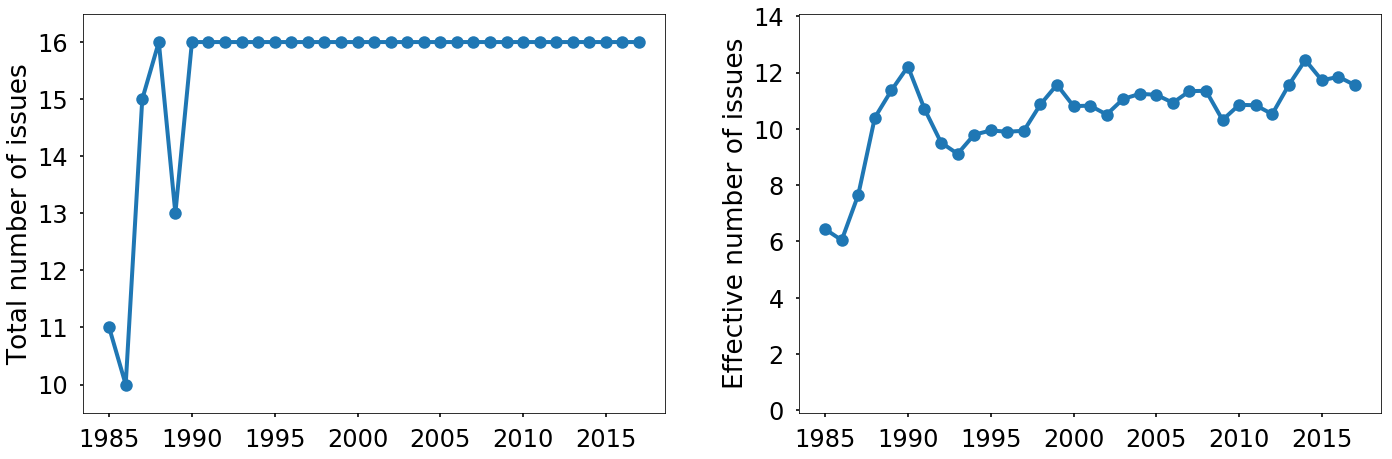

In [53]:
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, axs = plt.subplots(1, 2, figsize=(20,7))
#fig, axs = plt.subplots(1, 3, figsize=(25,7))

ax = axs[0]
ax.plot(years_table.year, n_issues_MORI,'.-',lw=4,ms=25)
ax.set_ylabel('Total number of issues')
#ax.set_xlabel('Years')
#ax.set_ylim(-0.1,18.1)
ax.set_ylim(9.5,16.5)

ax = axs[1]
ax.plot(years_table.year, 2**all_entropies_MORI,'.-',lw=4,ms=25)
ax.set_ylabel('Effective number of issues')
#ax.set_xlabel('Years')
#ax.set_ylim(5,15)
ax.set_ylim(-0.1,14.1)

#ax = axs[2]
#ax.plot(years_table.year, (2**all_entropies_MORI)/n_issues_MORI,'.-',lw=4,ms=25)
#ax.set_ylabel('enef/total')
#ax.set_xlabel('Years')
#ax.set_ylim(5,15)

plt.tight_layout()
plt.savefig('images-paper/Entropy-MORI.svg')

plt.show()

In [ ]:
"""
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots(1, 1, figsize=(10,7))

ax.plot(years_range, (2**all_entropies_MORI)/n_issues_MORI,'.-',lw=4,ms=25)
ax.set_ylabel('Effective number of issues ratio')
#ax.set_ylim(0.5,1)
ax.set_ylim(0.49, 0.91)

ax.set_xticks(range( int(5*np.floor(years_table.year.min()/5)), 2025, 5))

#plt.savefig('images/Entropy_MII.png',dpi=200)
plt.show()
"""

# Figure 2b: effective number of issues for GLES

In [37]:
GLES_over_time = pd.read_csv('VFW_project/GLES_issues_over_time.csv')

del GLES_over_time['politics']
del GLES_over_time['polity']

from dateutil.parser import parse
GLES_over_time['start_of_wave'] = GLES_over_time['start_of_wave'].apply(parse)

# Remove 2009
GLES_over_time = GLES_over_time.loc[8:]

In [38]:
GLES_over_time.index = GLES_over_time['start_of_wave']

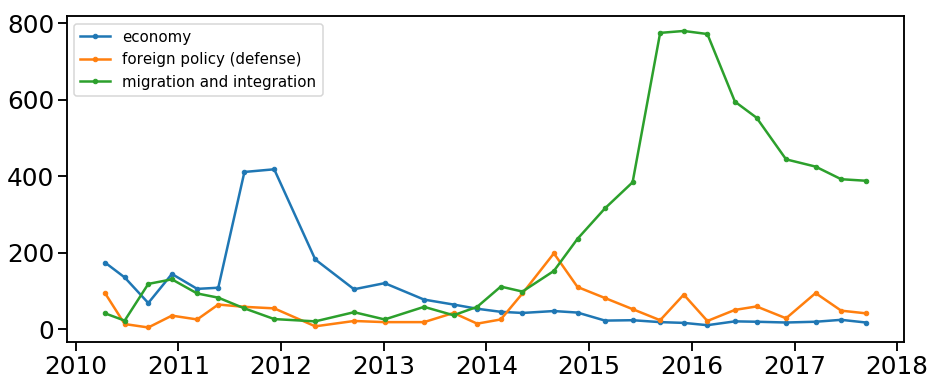

In [70]:
keys = ['migration and integration', 'economy', 'foreign policy (defense)']
        
plt.figure(figsize=(15,6))
for key in GLES_over_time.keys()[1:]:
    if key in keys:
        x = GLES_over_time['start_of_wave']
        y = GLES_over_time[key]
        plt.plot(x,y,'.-', label=key)
        #GLES_over_time[key].plot()
    
plt.legend(loc=2, fontsize=15, ncol=1)
plt.show()

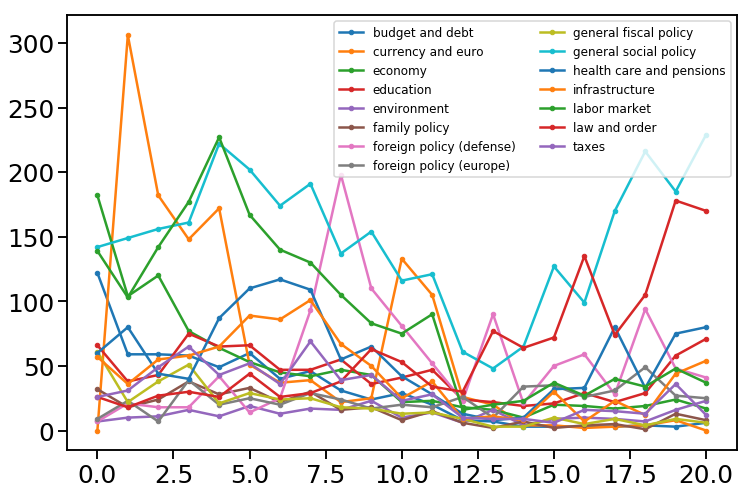

In [29]:
plt.figure(figsize=(12,8))
for key in GLES_over_time.keys()[1:]:
    if key != 'migration and integration':
        plt.plot(GLES_over_time[key].values[8:],'.-', label=key)
    
plt.legend(loc=1, fontsize=12, ncol=2)
plt.show()

In [9]:
all_entropies_GLES = []
n_issues_GLES = []

for index, row in GLES_over_time.iterrows():
    topic_array = np.array(row.values[1:],dtype=np.float64)
    all_entropies_GLES += [ entropy(topic_array)*entropy_fix ]
    n_issues_GLES      += [ sum(row.values[1:]>0) ]

all_entropies_GLES = np.array(all_entropies_GLES)
n_issues_GLES      = np.array(n_issues_GLES)

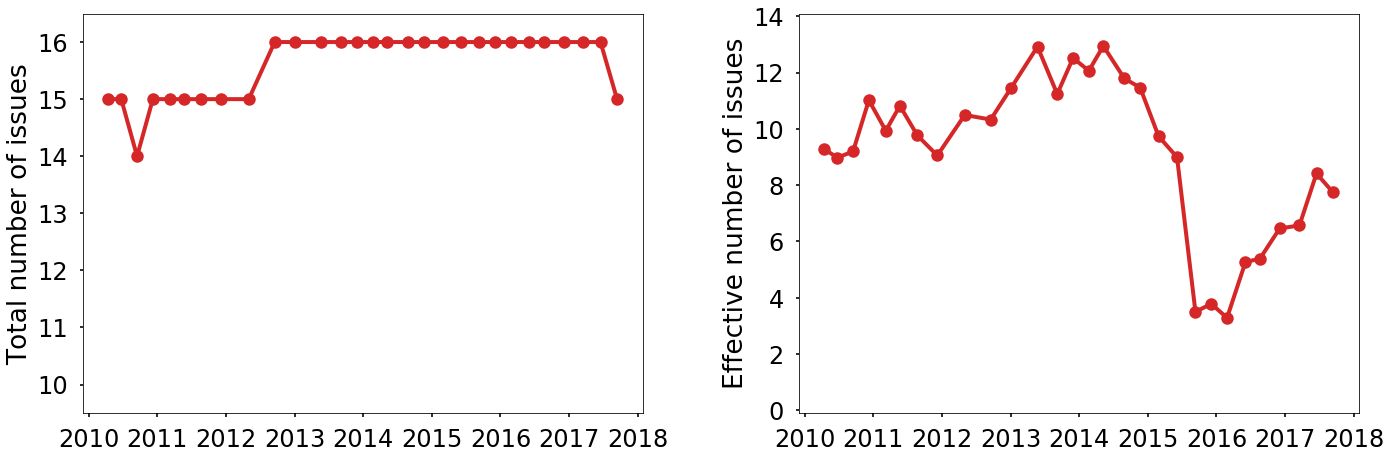

In [54]:
#from datetime import date
#xticks = [ date(year,1,1) for year in range(2010,2020,2)]

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, axs = plt.subplots(1, 2, figsize=(20,7))
#fig, axs = plt.subplots(1, 3, figsize=(25,7))

ax = axs[0]
ax.plot(GLES_over_time.start_of_wave, n_issues_GLES,'.-',lw=4,ms=25, c='#d62728')
ax.set_ylabel('Total number of issues')
#ax.set_xlabel('Years')
#ax.set_ylim(12.9,17.1)
ax.set_ylim(9.5,16.5)

ax = axs[1]
ax.plot(GLES_over_time.start_of_wave, 2**all_entropies_GLES,'.-',lw=4,ms=25, c='#d62728')
ax.set_ylabel('Effective number of issues')
#ax.set_xlabel('Years')
#ax.set_xticks(xticks)
ax.set_ylim(-0.1,14.1)

plt.tight_layout()
plt.savefig('images-paper/Entropy-GLES.svg')
plt.show()

In [ ]:
"""
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, axs = plt.subplots(1, 2, figsize=(20,7))

from datetime import date
date_MORI = [ date(i,1,1) for i in years_table.year ]
date_GLES = GLES_over_time.start_of_wave.values

ax = axs[0]

ax.plot(date_MORI, n_issues_MORI,'.-',lw=4,ms=25)
ax.plot(date_GLES, n_issues_GLES,'.-',lw=4,ms=25, c='#d62728')
ax.set_ylabel('Total number of issues')
ax.set_ylim(9.5,16.5)

ax = axs[1]
ax.plot(date_MORI, 2**all_entropies_MORI,'.-',lw=4,ms=25)
ax.plot(date_GLES, 2**all_entropies_GLES,'.-',lw=4,ms=25, c='#d62728')
ax.set_ylabel('Effective number of issues')
ax.set_ylim(-0.1,14.1)

plt.tight_layout()
#plt.savefig('images-paper/Entropy-MORI.svg')
plt.show()
"""

# Intermediary figure: two issues for MORI

29     199.00
30     215.00
31     200.00
32     196.00
33     193.00
34     199.00
35     170.00
36     190.00
37     190.00
38     202.00
39     187.00
40     164.00
41     185.00
42     177.00
43     186.00
44     182.00
45     191.00
46     192.00
47     166.00
48     159.00
49     175.00
50     179.00
51     168.00
52     195.00
53     179.25
54     185.00
55     185.25
56     186.00
57     195.00
58     215.25
        ...  
375    322.50
376    331.25
377    327.75
378    319.25
379    314.00
380    314.25
381    334.00
382    318.25
383    311.00
384    343.50
385    329.75
386    339.00
387    318.50
388    311.75
389    344.00
390    305.75
391    336.00
392    358.00
393    326.00
394    339.25
395    326.00
396    327.00
397    356.75
398    338.75
399    339.50
400    320.00
401    368.25
402    347.00
403    410.25
404    405.75
Length: 375, dtype: float64

In [273]:
len(sums)

375

In [274]:
sums/sums

29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0
40     1.0
41     1.0
42     1.0
43     1.0
44     1.0
45     1.0
46     1.0
47     1.0
48     1.0
49     1.0
50     1.0
51     1.0
52     1.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     1.0
      ... 
375    1.0
376    1.0
377    1.0
378    1.0
379    1.0
380    1.0
381    1.0
382    1.0
383    1.0
384    1.0
385    1.0
386    1.0
387    1.0
388    1.0
389    1.0
390    1.0
391    1.0
392    1.0
393    1.0
394    1.0
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
400    1.0
401    1.0
402    1.0
403    1.0
404    1.0
Length: 375, dtype: float64

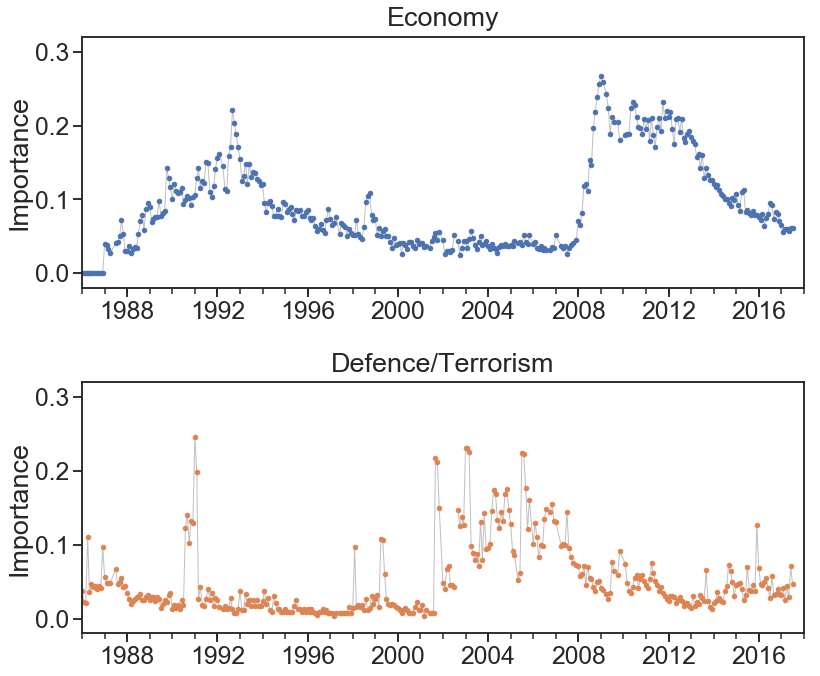

In [285]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Plot economy, immigration and terrorism
colour_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

selected_keys = [ 'Eco', 'Def' ]# , 'Rac' ]
fullname = {'Eco':'Economy','Def':'Defence/Terrorism', 'Rac':'Race and Immigration'}

issues_table = month_table.replace(-1, 0).filter(selected_keys + ['year']).copy()
#issues_table['Rac'] += month_table['Imm']

sums = month_table.replace(-1, 0)[month_table.keys()[:-2]].sum(axis=1)
for key in selected_keys:
    issues_table[key] /= sums
    
issues_table.index = month_table['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#issues_table = issues_table[ issues_table.year > 2009 ]

fig, axs = plt.subplots(2,1,figsize=(12,10))

for key,ax,c in zip(selected_keys,axs,colour_cycle):
    x = issues_table.index
    y = issues_table[key]
    ax.plot(x, y, '-', c='silver', lw=1)
    ax.plot(x, y, '.', c=c, label=fullname[key])
    
    #ax.set_xlim(x[18],x.max())

    # format the ticks
    #ax.xaxis.set_major_locator(years)
    #ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(years)

    
    start = 18
    #start = 220
    
    # round to nearest years.
    datemin = np.datetime64(x[start], 'Y')
    datemax = np.datetime64(x[-1], 'Y') + np.timedelta64(1, 'Y')
    ax.set_xlim(datemin, datemax)

    ax.set_ylim(-0.02,0.32)
    ax.set_ylabel('Importance')
    
    ax.set_title(fullname[key])
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    #ax.legend(loc=2)

plt.tight_layout()
#plt.savefig('images-paper/Fig-time-series-MORI.png')
plt.show()

# Fig 3a: novelty for MORI

In [188]:
from numpy.linalg import norm
from scipy.spatial.distance import hamming
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score

def rel_entr(p, q, ep=0.01, fill_all_zeros=True):
    if fill_all_zeros is True:
        P = [ i if i > 0 else ep for i in p ]
        Q = [ i if i > 0 else ep for i in q ]
        return entropy(P,Q)*entropy_fix
    
    else:
        P = []
        Q = []
        for i in range(len(p)):
            
            if p[i] == 0:
                if q[i] != 0:
                    P += [ep]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [q[i]]
                    continue
                    
            else:# p[i] != 0
                if q[i] != 0:
                    P += [p[i]]
                    Q += [q[i]]
                else: # q[i] == 0
                    P += [p[i]]
                    Q += [ep]
                    
        return entropy(P,Q)*entropy_fix


def JSD(P, Q,ep=0.01, fill_all_zeros=True):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (rel_entr(_P, _M,ep=ep,fill_all_zeros=fill_all_zeros) + rel_entr(_Q, _M,ep=ep,fill_all_zeros=fill_all_zeros))


def BCD(P,Q):
    _P = np.array(P / norm(P, ord=1),dtype=np.float32)
    _Q = np.array(Q / norm(Q, ord=1),dtype=np.float32)
    BC = np.dot(np.sqrt(_P),np.sqrt(_Q))
    
    return -np.log2(BC)    


def MI(_P,_Q):
    return mutual_info_score(_P,_Q)


def novelty(p,q,metric='KL', ep=0.01, faz=True):
    
    if metric=='KL':
        return rel_entr(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='hamming':
        return hamming(p>0,q>0)
    elif metric=='euclidean':
        return euclidean(p,q)
    elif metric=='JSD':
        return JSD(p,q,ep=ep,fill_all_zeros=faz)
    elif metric=='BCD':
        return BCD(p,q)
    elif metric=='MI':
        return MI(p,q)
    else:
        return 0

In [189]:
# OPTION 1: whole table
#issues_table = table_moving_average.copy()
issues_table_MORI = month_table.copy()

# OPTION 2: only some issues
selected_keys = ['Une', 'NHS', 'Eco', 'Cri', 'Edu', 'Rac', 'Def', 'Com', 'Pen', 'Hou', \
       'Inf', 'Pol', 'Nuc', 'LG', 'Dru', 'Tax']
issues_table_MORI = table_moving_average.filter(selected_keys + ['month','year']).copy()
issues_table_MORI['Rac'] += table_moving_average['Imm']

#issues_table = issues_table[ issues_table.year > 1990 ]

table = issues_table_MORI

In [57]:
issues_tplus1 = table[table.index>table.index[0]]

eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}
JSDs = {}
BCDs = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    jensen = []
    bhatta = []
    
    row = table.iloc[0]
    previous_topic_array = np.array(row.values[:-2])
   
    for index, row in issues_tplus1.iterrows():
        topic_array = np.array(row.values[:-2])
        y1 = previous_topic_array
        y2 = topic_array
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]
        bhatta += [ novelty(y2, y1, metric='BCD') ]
        previous_topic_array = topic_array    
        
        #if( ep==0.001 and ( novelty(y2, y1, metric='KL', ep=ep, faz=False) > 0.04 )):
        #    print(index, row.year, row.month)
        
    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    JSDs[ep]          = jensen
    BCDs[ep]          = bhatta
    
novelties_month = {
    'KL0':KLs_faz_False,
    'KL1':KLs_faz_True,
    'JSD':JSDs,
    'BCD':BCDs
    }

In [67]:
issues_tplus1.keys()

Index(['Une', 'NHS', 'Eco', 'Cri', 'Edu', 'Rac', 'Def', 'Com', 'Pen', 'Hou',
       'Inf', 'Pol', 'Nuc', 'LG', 'Dru', 'Tax', 'month', 'year'],
      dtype='object')

In [58]:
windowsize = 12
issues_tplus1 = table[table.index>=table.index[windowsize]]
eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}
JSDs = {}
BCDs = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    jensen = []
    bhatta = []
    
    row = table.iloc[0]
    #previous_topic_array = np.array(row.values[:-2])
   
    for index, row in issues_tplus1.iterrows():
        #topic_array = np.array(row.values[:-2])
        
        y1 = table.loc[index-12:index-1, ~table.columns.isin(['month','year'])].mean().values
        y2 = np.array(row.values[:-2])
        
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]
        bhatta += [ novelty(y2, y1, metric='BCD') ]
        #previous_topic_array = topic_array

    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    JSDs[ep]          = jensen
    BCDs[ep]          = bhatta
    
novelties_year = {
    'KL0':KLs_faz_False,
    'KL1':KLs_faz_True,
    'JSD':JSDs,
    'BCD':BCDs
    }

In [59]:
novelties = { 'month':novelties_month, 'year':novelties_year }

ep = 0.001


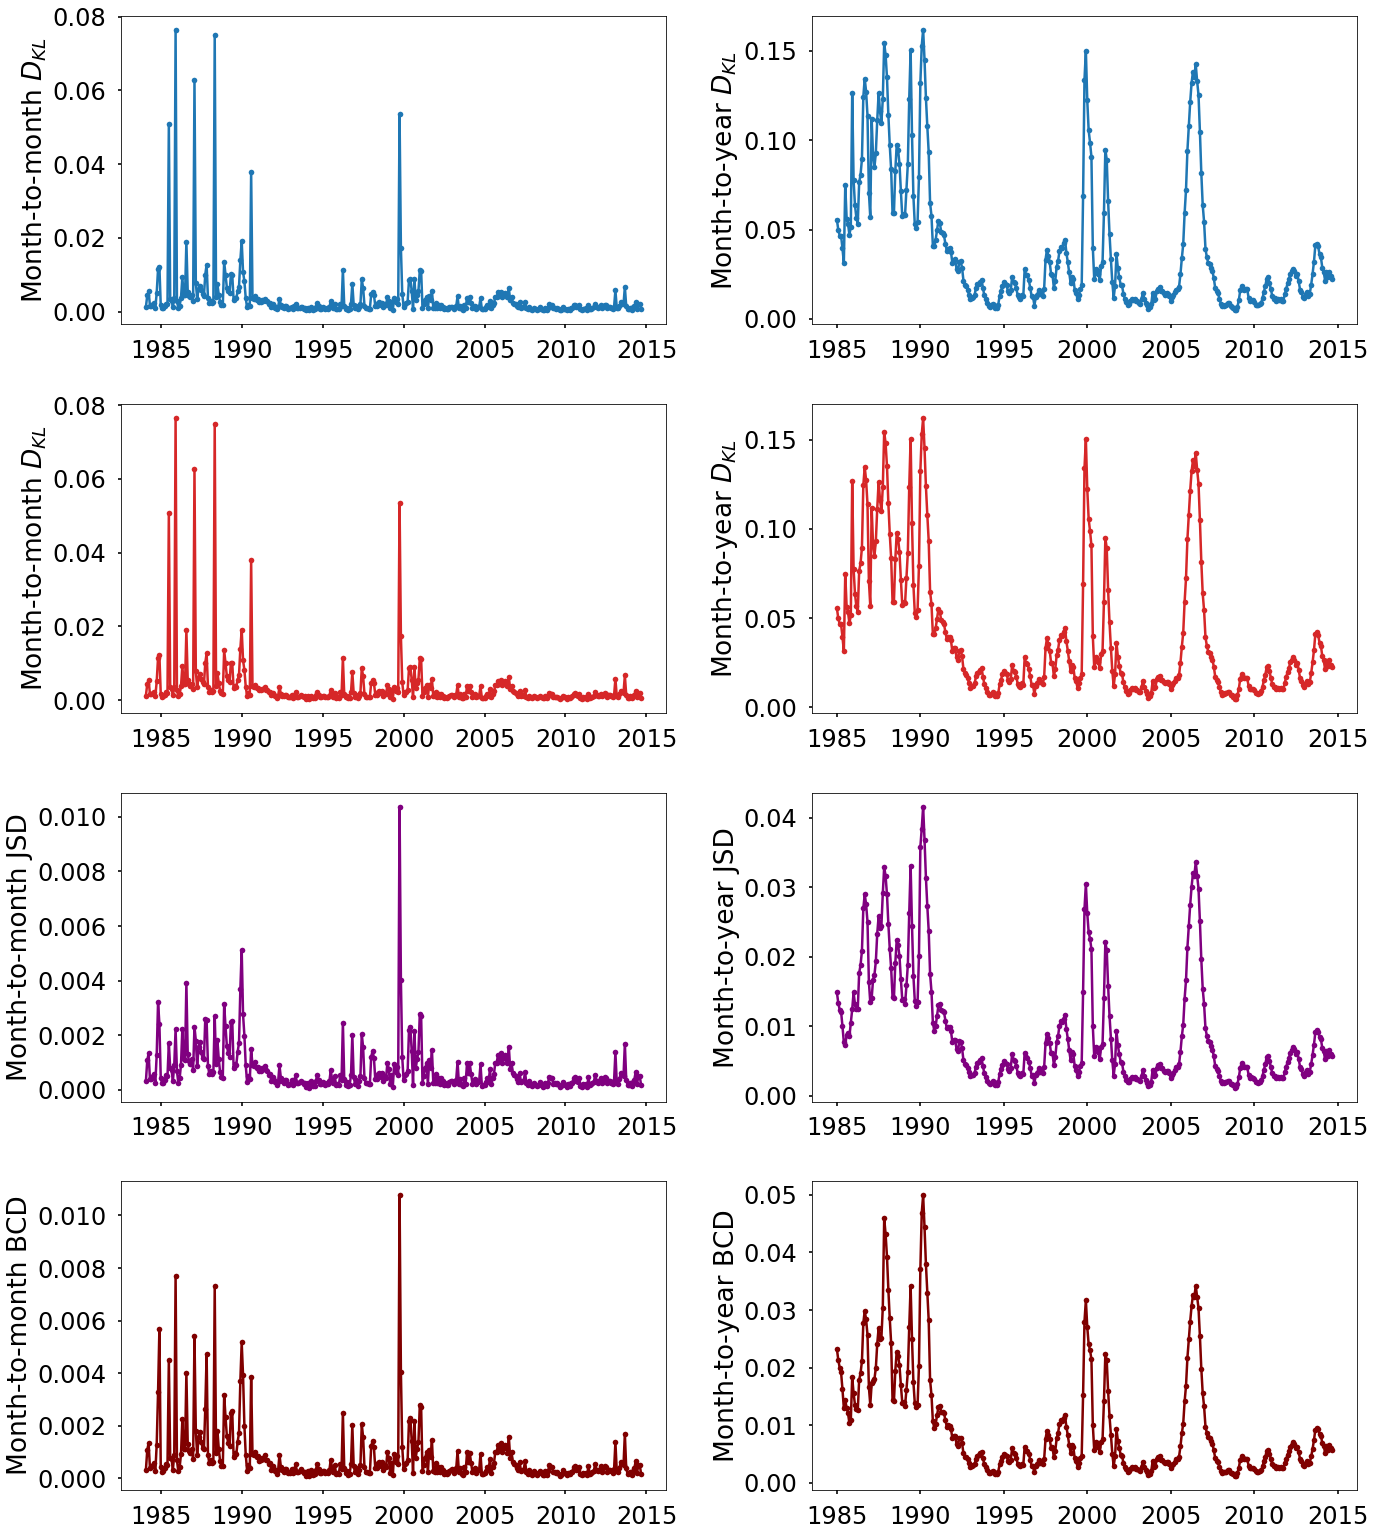

In [60]:
fig, axs = plt.subplots(4, 2, figsize=(20,22))
axs = axs.reshape((axs.size,))
xticks = np.arange(windowsize,35*12,5*12)
xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

ep = 0.001

for index, key in enumerate(['month','year']):
    indices = table.index[1+(index*11):]
    KLs_faz_False = novelties[key]['KL0']
    KLs_faz_True  = novelties[key]['KL1']
    JSDs          = novelties[key]['JSD']
    BCDs          = novelties[key]['BCD']
    
    # Fill all zeros = False:
    ax = axs[0 + index]
    ax.plot(indices, KLs_faz_False[ep], '.-')
    ax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    #ax.set_ylim(-0.1,7)

    # Fill all zeros = True:
    ax = axs[2 + index]
    ax.plot(indices, KLs_faz_True[ep], '.-', c='#d62728')
    ax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    # JSDs:
    ax = axs[4 + index]
    ax.plot(indices, JSDs[ep], '.-', c='purple')
    ax.set_ylabel(r'Month-to-%s JSD' % key)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    #ax.set_ylim(-0.1,2.5)

    # Bhattacharya distance
    ax = axs[6 + index]
    ax.plot(indices, BCDs[ep], '.-', c='maroon')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel(r'Month-to-%s BCD' % key)

plt.tight_layout()
#plt.savefig('images/divergence-month-to-month.png', dpi=300)

print('ep = %g' % ep)
plt.show()

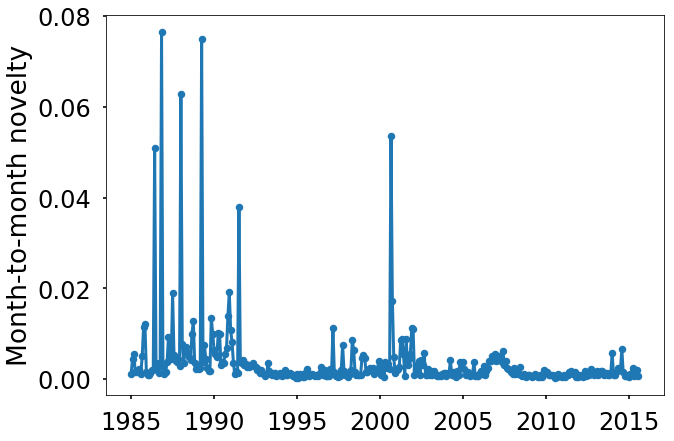

In [722]:
table = issues_table_MORI

fig, ax = plt.subplots(1,1,figsize=(10,7))

xticks = np.arange(1,35*12,5*12)
xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

ep = 0.001

key = 'month'
indices = table.index[1:]
KLs_faz_False = novelties[key]['KL0']

ax.plot(indices, KLs_faz_False[ep], '.-',lw=3, ms=15)
#ax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)
ax.set_ylabel(r'Month-to-%s novelty' % key)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
#ax.set_ylim(-0.1,7)

#plt.savefig('images-paper/Novelty-MORI.svg')
plt.show()

## Calculate quarter-to-quarter novelty

In [243]:
quarter_mask = ( table.month.apply(lambda x: x[:3]).isin(['Jan','Apr','Jul','Oct']) )
table_quarter = table[quarter_mask]

issues_tplus1 = table_quarter[table_quarter.index>table_quarter.index[0]]

eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    
    row = table.iloc[0]
    previous_topic_array = np.array(row.values[:-2])
   
    for index, row in issues_tplus1.iterrows():
        topic_array = np.array(row.values[:-2])
        y1 = previous_topic_array
        y2 = topic_array
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        previous_topic_array = topic_array    
        
    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    
novelties_quarter = {
    'KL0':KLs_faz_False,
    'KL1':KLs_faz_True,
    }

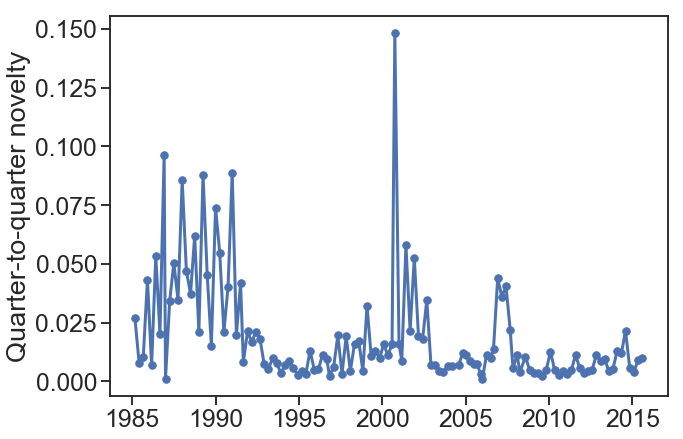

In [262]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

table = issues_table_MORI

fig, ax = plt.subplots(1,1,figsize=(10,7))

xticks = np.arange(1,35*12,5*12)
xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

indices = table_quarter.index[1:]
KLs_faz_False = novelties_quarter['KL0']

ep=0.001
ax.plot(indices, KLs_faz_False[ep], '.-',lw=3, ms=15)
ax.set_ylabel(r'Quarter-to-quarter novelty')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
#ax.set_ylim(-0.1,7)

plt.savefig('images-paper/Novelty-MORI-Quarterly.svg')
plt.show()

In [ ]:
"""
fig, ax = plt.subplots(1,1,figsize=(10,7))

xticks = np.arange(12,35*12,5*12)
xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

ep = 0.001

key = 'year'
indices = table.index[12:]
KLs_faz_False = novelties[key]['KL0']

ax.plot(indices, KLs_faz_False[ep], '.-',lw=2, ms=10)
ax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
#ax.set_ylim(-0.1,7)

print('ep = %g' % ep)
plt.show()
"""

In [ ]:
# See what caused a peak
"""
t = 189
y1 = issues_tplus1.loc[t-1].values[:-2]
y2 = issues_tplus1.loc[t].values[:-2]
novelty(y2, y1, metric='KL', ep=0.001, faz=False)

plt.plot(y1, '.-')
plt.plot(y2, '.-')
novelty(y2, y1, metric='KL', ep=0.001, faz=False)
"""

In [ ]:
"""
xrange = range(290,371)

windowsize = 3
M = np.array([ table.loc[index-windowsize:index-1, ~table.columns.isin(['month','year'])].mean().values for index in xrange ])

fig, ax = plt.subplots(figsize=(15,7))

x = table.index[xrange][1:]
y = [ novelty(M[t], M[t-1], metric='KL', ep=ep, faz=True) for t in range(1,len(M))]

ax.plot(x[1:], y[1:], '.-', lw=3, ms=15)

xticks = np.arange(min(x[2:]), max(x), 12)
xticklabels = table.month[xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90);
"""

In [535]:
# Average novelty over time?
"""
N = 11

ep = 0.001
windowsize = 12

fig, ax = plt.subplots(1,1,figsize=(10,7))

xticks = np.arange(N,35*12,5*12)
xticklabels = [ str(i) for i in np.arange(1985,2020,5) ]

key = 'month'
indices = table.index[N:]
KLs_faz_False = novelties[key]['KL0']

y = running_mean(KLs_faz_False[ep], N=N)

ax.plot(indices, y, '.-',lw=4, ms=10)

ax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
#ax.set_ylim(-0.1,7)

print('ep = %g' % ep)
plt.show()
"""

"N = 11\n\nep = 0.001\nwindowsize = 12\n\nfig, ax = plt.subplots(1,1,figsize=(10,7))\n\nxticks = np.arange(N,35*12,5*12)\nxticklabels = [ str(i) for i in np.arange(1985,2020,5) ]\n\nkey = 'month'\nindices = table.index[N:]\nKLs_faz_False = novelties[key]['KL0']\n\ny = running_mean(KLs_faz_False[ep], N=N)\n\nax.plot(indices, y, '.-',lw=4, ms=10)\n\nax.set_ylabel(r'Month-to-%s $D_{KL}$' % key)\nax.set_xticks(xticks)\nax.set_xticklabels(xticklabels)\n#ax.set_ylim(-0.1,7)\n\nprint('ep = %g' % ep)\nplt.show()\n"

# Fig 3b: novelty for GLES

In [723]:
windowsize = 1

table = GLES_over_time.copy()

# Removed issue that was introduced(?) in 2012
del table['currency and euro']

issues_tplus1 = table[table.index>=table.index[windowsize]]

eps = [0.001, 0.01, 0.1, 0.2]
KLs_faz_True = {}
KLs_faz_False = {}
JSDs = {}
BCDs = {}

for ep in eps:
    relative_entropies_True = []
    relative_entropies_False = []
    jensen = []
    bhatta = []
      
    for index, row in issues_tplus1.iterrows():

        y1 = table.loc[index-windowsize:index-1, ~table.columns.isin(['start_of_wave'])].mean().values
        y2 = np.array(row.values[1:])        
        
        relative_entropies_True  += [ novelty(y2, y1, metric='KL', ep=ep, faz=True) ]
        relative_entropies_False += [ novelty(y2, y1, metric='KL', ep=ep, faz=False) ]
        jensen += [ novelty(y2, y1, metric='JSD', ep=ep, faz=False) ]
        bhatta += [ novelty(y2, y1, metric='BCD') ]

    KLs_faz_True[ep]  = relative_entropies_True
    KLs_faz_False[ep] = relative_entropies_False
    JSDs[ep]          = jensen
    BCDs[ep]          = bhatta
    
novelties_GLES = {
    'KL0':KLs_faz_False,
    'KL1':KLs_faz_True,
    'JSD':JSDs,
    'BCD':BCDs
    }

ep = 0.001


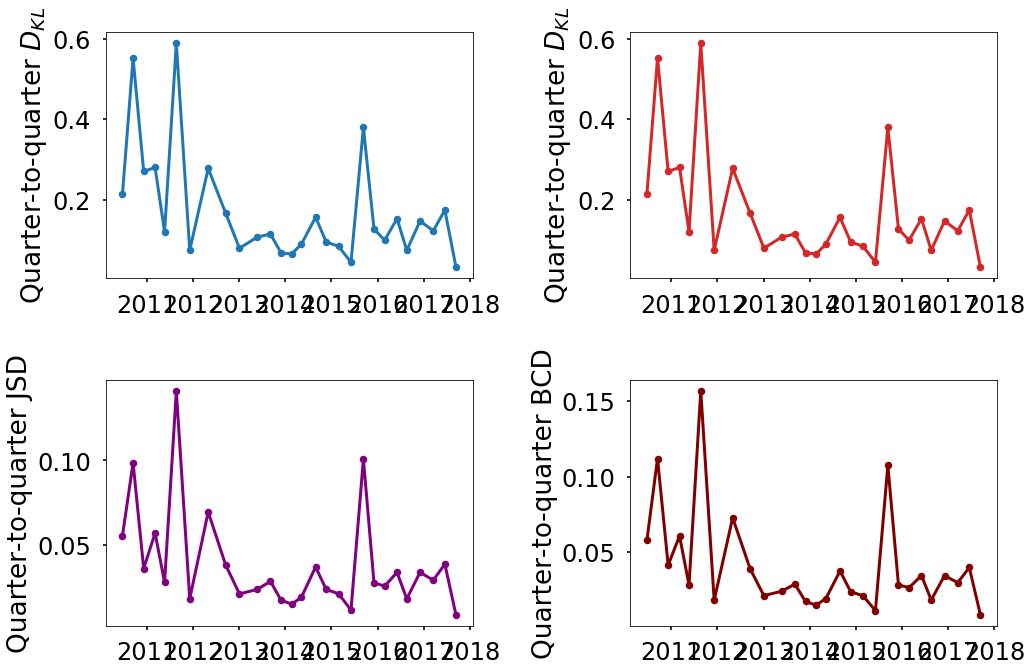

In [724]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.reshape((axs.size,))

start = 4
windowsize = 1
ep = 0.001
indices = table.start_of_wave[windowsize:]

KLs_faz_False = novelties_GLES['KL0']
KLs_faz_True  = novelties_GLES['KL1']
JSDs          = novelties_GLES['JSD']
BCDs          = novelties_GLES['BCD']

lw = 3
ms = 15

# Fill all zeros = False:
ax = axs[0]
ax.plot(indices, KLs_faz_False[ep], '.-', lw=lw, ms=ms)
ax.set_ylabel(r'Quarter-to-quarter $D_{KL}$')
#ax.set_ylim(-0.1,7)

# Fill all zeros = True:
ax = axs[1]
ax.plot(indices, KLs_faz_True[ep], '.-', lw=lw, ms=ms, c='#d62728')
ax.set_ylabel(r'Quarter-to-quarter $D_{KL}$')

# JSDs:
ax = axs[2]
ax.plot(indices, JSDs[ep], '.-', lw=lw, ms=ms, c='purple')
ax.set_ylabel(r'Quarter-to-quarter JSD')
#ax.set_ylim(-0.1,2.5)

# Bhattacharya distance
ax = axs[3]
ax.plot(indices, BCDs[ep], '.-', lw=lw, ms=ms, c='maroon')
ax.set_ylabel(r'Quarter-to-quarter BCD')

plt.tight_layout()
#plt.savefig('images/divergence-month-to-month.png', dpi=300)

print('ep = %g' % ep)
plt.show()

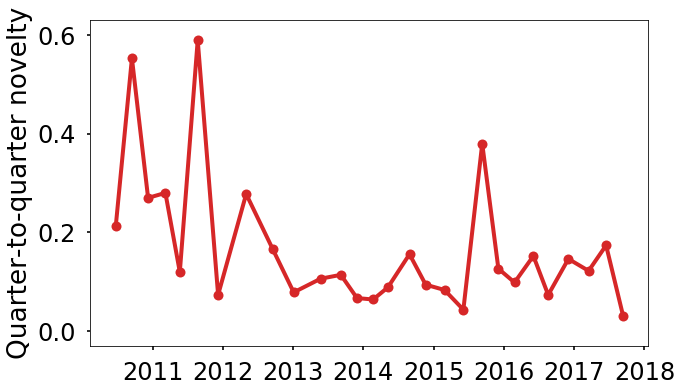

In [726]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ep = 0.001
indices = table.start_of_wave[windowsize:]

ax.plot(indices, KLs_faz_False[ep], '.-', lw=4, ms=20, c='#d62728')
#ax.set_ylabel(r'Quarter-to-quarter $D_{KL}$')
ax.set_ylabel(r'Quarter-to-quarter novelty')
ax.set_ylim(-0.03,0.63)

plt.savefig('images-paper/Novelty-GLES.svg')
plt.show()

# Figure 4a: effective number of issues for Der Spiegel

In [6]:
def corrected_entropy(v, filler=1e-5):
    minv = min(v)
    v2 = [ i if i > minv else filler for i in v ]
    return entropy(v2)*entropy_fix

In [8]:
n_topics = 30

#words_per_topic     = pd.read_csv('der_spiegel/data/topic_word_distributions_'+str(n_topics)+'topics.csv', index_col=0)
topics_per_document = pd.read_csv('der_spiegel/data/document_topic_distributions_'+str(n_topics)+'topics.csv', index_col=0)

In [7]:
years = range(1947,2017)

infiles = [ 'der_spiegel/data/%d.csv' % d for d in years ]

# create DataFrame for all articles
df_alldocs = pd.DataFrame()

for infile in infiles:

    df_year = pd.read_csv(infile, index_col=0)
    df_year = df_year[pd.notnull(df_year['text'])]
    del df_year['text']
    
    # uncomment for short run
    #df = df.head(50)
    
    df_alldocs = df_alldocs.append(df_year)

In [9]:
table = topics_per_document

all_entropies = []
n_issues = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    all_entropies += [ corrected_entropy(topic_array) ]
    minrow = min(row)
    n_issues      += [ sum(row.values>minrow) ]

all_entropies = np.array(all_entropies)
n_issues      = np.array(n_issues)

In [12]:
doc_to_date_spiegel = { row.filename:(row.year, row.week) for _, row in df_alldocs.iterrows() }
all_dates = set(sorted(doc_to_date_spiegel.values()))
all_documents = topics_per_document.index.values

from datetime import datetime
import time

dates = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],date[1]), '%Y %W %w'))) 
         for date in sorted(all_dates)]

In [13]:
table = topics_per_document

topics_per_date_spiegel = {}

sorted_dates_spiegel = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    date = doc_to_date_spiegel[index]
    date = str(date[0])+'-'+str(date[1]).zfill(2)
    
    if date not in topics_per_date_spiegel:
        topics_per_date_spiegel[date]  = topic_array
        sorted_dates_spiegel += [ date ]
    else:
        topics_per_date_spiegel[date] += topic_array
        
sorted_dates_spiegel = sorted(sorted_dates_spiegel)        

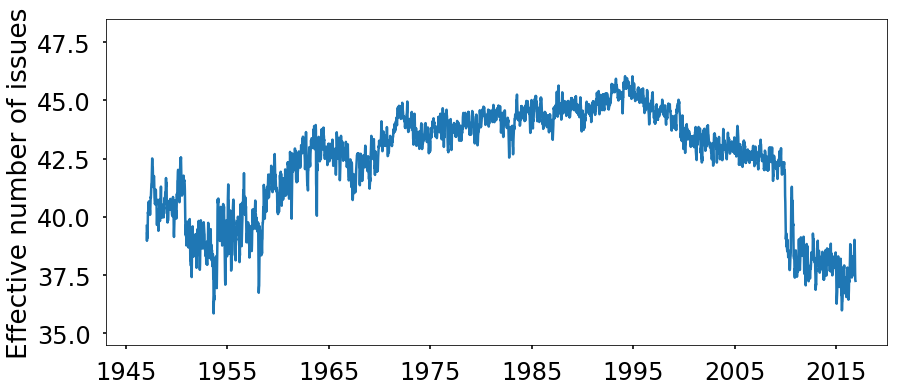

In [147]:
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
eff_n_topics_per_date = [ 2**corrected_entropy(topics_per_date_spiegel[date]) for date in sorted_dates_spiegel ]

dates_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates_spiegel]

N = 5
x = dates_x[ int(N/2) : -int(N/2)]
y = running_mean(eff_n_topics_per_date, N=N)

plt.figure(figsize=(14,6))
plt.plot(x, y);
plt.ylabel('Effective number of issues'); # per week

plt.xlim(datetime(1943,1,1,0,0),datetime(2020,1,1,0,0))
xticks = np.arange(1945,2025,10)
plt.xticks([ datetime(i,1,1,0,0) for i in xticks])

plt.ylim(34.5,48.5)
yticks = np.arange(35,50,2.5)
plt.yticks(yticks)

#plt.savefig('images-paper/Spiegel-eff_n_topics_per_week_50topics.svg')
plt.show()

In [ ]:
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
eff_n_topics_per_date = [ 2**corrected_entropy(topics_per_date_spiegel[date]) for date in sorted_dates_spiegel ]

dates_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates_spiegel]

N = 5
x = dates_x[ int(N/2) : -int(N/2)]
y = running_mean(eff_n_topics_per_date, N=N)

plt.figure(figsize=(14,6))
plt.plot(x, y);
plt.ylabel('Effective number of issues'); # per week

plt.xlim(datetime(1943,1,1,0,0),datetime(2020,1,1,0,0))
xticks = np.arange(1945,2025,10)
plt.xticks([ datetime(i,1,1,0,0) for i in xticks])

plt.ylim(34.5,48.5)
yticks = np.arange(35,50,2.5)
plt.yticks(yticks)

#plt.savefig('images-paper/Spiegel-eff_n_topics_per_week_50topics.svg')
plt.show()

# Figure 4b: effective number of issues for The Times

In [3]:
#df = pd.read_csv('UK_media/guardian_data/eff_n_topics_per_date.csv', index_col=0)
df = pd.read_csv('UK_media/times_data/eff_n_topics_per_week.csv', index_col=0)

eff_n_topics_per_date       = df.eff_n_topics_per_date.values
sorted_dates_times          = df.date.values

import time
from datetime import datetime
weeks_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates_times]

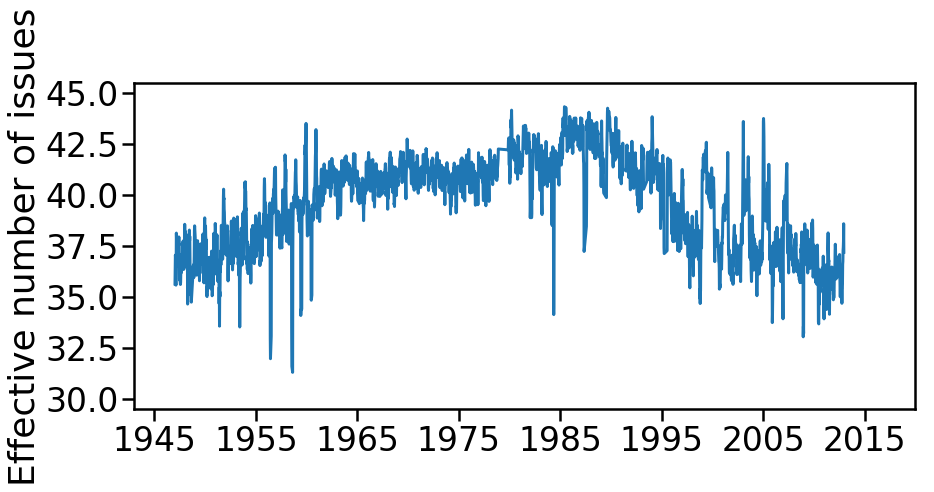

In [30]:
#sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

#x = dates_x
#y = eff_n_topics_per_date

N = 3
x = np.array(weeks_x[ int(N/2) : -int(N/2)])
y = running_mean(eff_n_topics_per_date, N=N)

plt.figure(figsize=(14,6))

#plt.plot(x, y, lw=3);

# Filter for values > 20
plt.plot(x[y>30], y[y>30], lw=3);

plt.ylabel('Effective number of issues'); # per week

plt.xlim(datetime(1943,1,1,0,0),datetime(2020,1,1,0,0))
xticks = np.arange(1945,2025,10)
plt.xticks([ datetime(i,1,1,0,0) for i in xticks])

#plt.ylim(3,48)
#yticks = np.arange(5,55,10)

plt.ylim(29.5,45.5)
yticks = np.arange(30,47,2.5)
plt.yticks(yticks)

plt.savefig('images-paper/Times-eff_n_topics_per_week_50topics.svg')
plt.show()

# Figure 5a: novelty for Der Spiegel

 I've created all data/df_novelty_week17_1947.csv on the cluster. Transfer it to my oii pc and make the plots in '# Plot week-week novelty plots for every year' again.

In [157]:
df = pd.read_csv('der_spiegel/data/df_grouped.csv', index_col=0)
years = df.index
pal = sns.cubehelix_palette(len(years), rot=-.25, light=.7)
colour_dict = { y:c for y,c in zip(years, pal) }

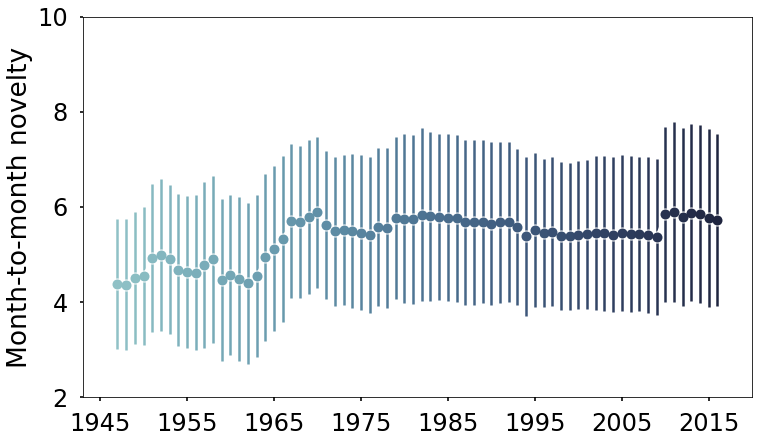

In [158]:
#sns.set_context('poster')
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(1,1,figsize=(12,7))

x    = df.index.values
y    = df['mean'].values
yerr = df['std'].values
c = [colour_dict[i] for i in x]

ax.plot(x,y, markersize=12, marker='o', c='w');
for ix, iy, iyerr, ic in zip(x,y,yerr,c):
    ax.errorbar(ix,iy, yerr=iyerr, markersize=10, marker='o', c=ic);

#ax.set_ylabel(r'Month-to-month $D_{KL}$')
ax.set_ylabel(r'Month-to-month novelty')
ax.set_ylim(2,10)
ax.set_yticks(np.arange(2,12,2))

ax.set_xlim(1943,2020)
xticks = np.arange(1945,2025,10)
ax.set_xticks(xticks)

plt.savefig('images-paper/novelty-Spiegel.svg')
plt.show()

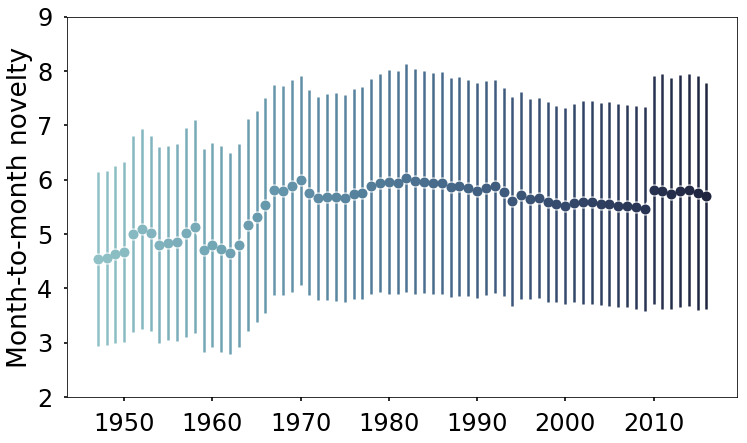

In [9]:
df = pd.read_csv('der_spiegel/data/KL_all_weeks_30topics.csv', index_col=0)
df = df.groupby(['year']).mean()

years = df.index
pal = sns.cubehelix_palette(len(years), rot=-.25, light=.7)
colour_dict = { y:c for y,c in zip(years, pal) }

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(1,1,figsize=(12,7))

x    = df.index.values
y    = df['meanKL'].values
yerr = df['stdKL'].values
c = [colour_dict[i] for i in x]

ax.plot(x,y, markersize=12, marker='o', c='w');
for ix, iy, iyerr, ic in zip(x,y,yerr,c):
    ax.errorbar(ix,iy, yerr=iyerr, markersize=10, marker='o', c=ic);

#ax.set_ylabel(r'Month-to-month $D_{KL}$')
ax.set_ylabel(r'Month-to-month novelty')
ax.set_ylim(2,9)    
    
#plt.savefig('images-paper/novelty-Spiegel.svg')
plt.show()

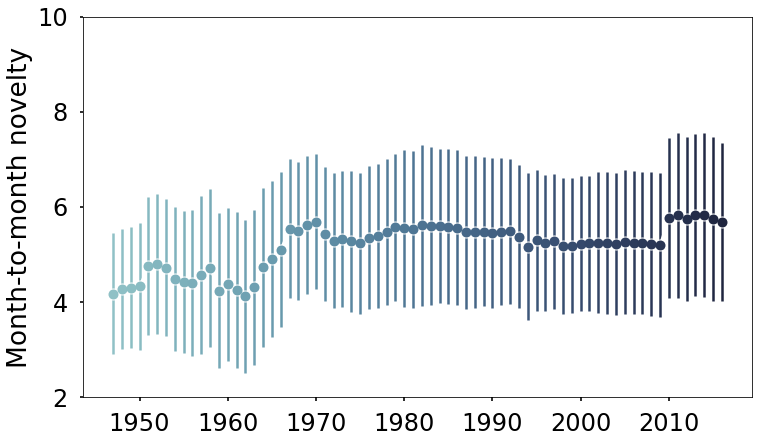

In [155]:
df = pd.read_csv('der_spiegel/data/KL_all_weeks_70topics.csv', index_col=0)
df = df.groupby(['year']).mean()

years = df.index
pal = sns.cubehelix_palette(len(years), rot=-.25, light=.7)
colour_dict = { y:c for y,c in zip(years, pal) }

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(1,1,figsize=(12,7))

x    = df.index.values
y    = df['meanKL'].values
yerr = df['stdKL'].values
c = [colour_dict[i] for i in x]

ax.plot(x,y, markersize=12, marker='o', c='w');
for ix, iy, iyerr, ic in zip(x,y,yerr,c):
    ax.errorbar(ix,iy, yerr=iyerr, markersize=10, marker='o', c=ic);

#ax.set_ylabel(r'Month-to-month $D_{KL}$')
ax.set_ylabel(r'Month-to-month novelty')
ax.set_ylim(2,8)    
    
#plt.savefig('images-paper/novelty-Spiegel.svg')
plt.show()

# Figure 5b: novelty for The Times

In [3]:
"""
from datetime import datetime, date

df_allyears_guardian = pd.DataFrame()

for year in range(2013,2019):
    df = pd.read_csv('UK_media/guardian_data/df_sum_KLs_%d.csv' % year)
    df.columns = ['mean','count','std','week','year']
    
    # Group by 3 months
    df['date'] = [ date(year, 3+3*int((i-6)/11), 1) for i in df.week ]
    
    # Group by 2 months
    #df['date'] = [ date(year, 2+2*int((i-6)/8), 1) for i in df.week ]
    
    # Group by 1 month
    #df['date'] = [ date(year,int(i/4),1) for i in df.week ]
    
    # Do not group (group by week)
    #df['date'] = (df['week']-5)/45 + year
        
    df = df.groupby('date').mean()
    df_allyears_guardian = df_allyears_guardian.append(df)

df = df_allyears_guardian
"""

In [31]:
from datetime import datetime, date

#df_allyears_times = pd.read_csv('UK_media/times_data/all_KLs_50topics.csv')
df_allyears_times = pd.read_csv('UK_media/times_data/all_KLs_per_year_50topics.csv')
df_allyears_times.index = df_allyears_times['year']
del df_allyears_times['year']

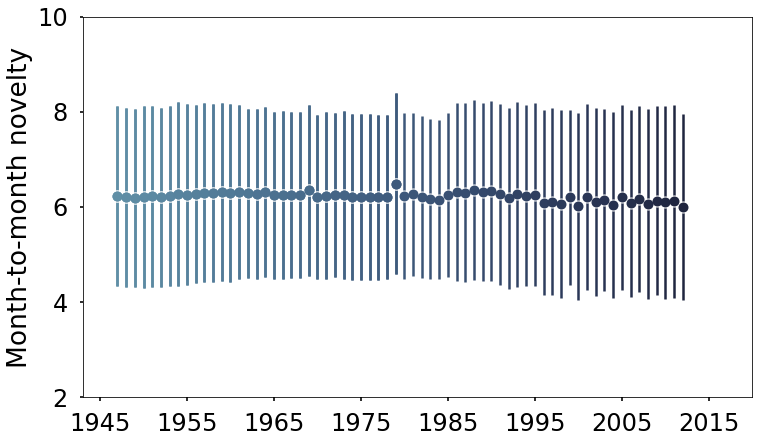

In [154]:
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(1,1,figsize=(12,7))

df = df_allyears_times

x = df.index.values
y = df['meanKL'].values
yerr = df['stdKL'].values
pal = sns.cubehelix_palette(len(x), rot=-.25, light=.7)
colour_dict = { y:c for y,c in zip(x, pal) }
c = [colour_dict[i] for i in x]

ax.plot(x,y, 'o', markersize=12, c='w');
for ix, iy, iyerr, ic in zip(x,y,yerr,c):
    ax.errorbar(ix,iy, yerr=iyerr, markersize=10, marker='o', c=ic);

#ax.set_xticks([ date(year,3,1) for year in range(2013,2019) ])
#ax.set_xticklabels(range(2013,2019))

ax.set_ylabel(r'Month-to-month novelty')
ax.set_ylim(2,10)
ax.set_yticks(np.arange(2,12,2))

ax.set_xlim(1943,2020)
xticks = np.arange(1945,2025,10)
ax.set_xticks(xticks)
    
plt.savefig('images-paper/novelty-Times.svg')
plt.show()

# SI Figure: Null model with Der Spiegel data

In [13]:
table = topics_per_document

topics_per_year = {}

sorted_years = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    date = doc_to_date_spiegel[index]
    year = date[0]
    
    if year not in topics_per_year:
        topics_per_year[year]  = topic_array
        sorted_years += [ year ]
    else:
        topics_per_year[year] += topic_array
        
sorted_years = sorted(sorted_years)        

In [14]:
eff_n_topics_per_year = [ 2**corrected_entropy(topics_per_year[year]) for year in sorted_years ]
years_x = sorted_years

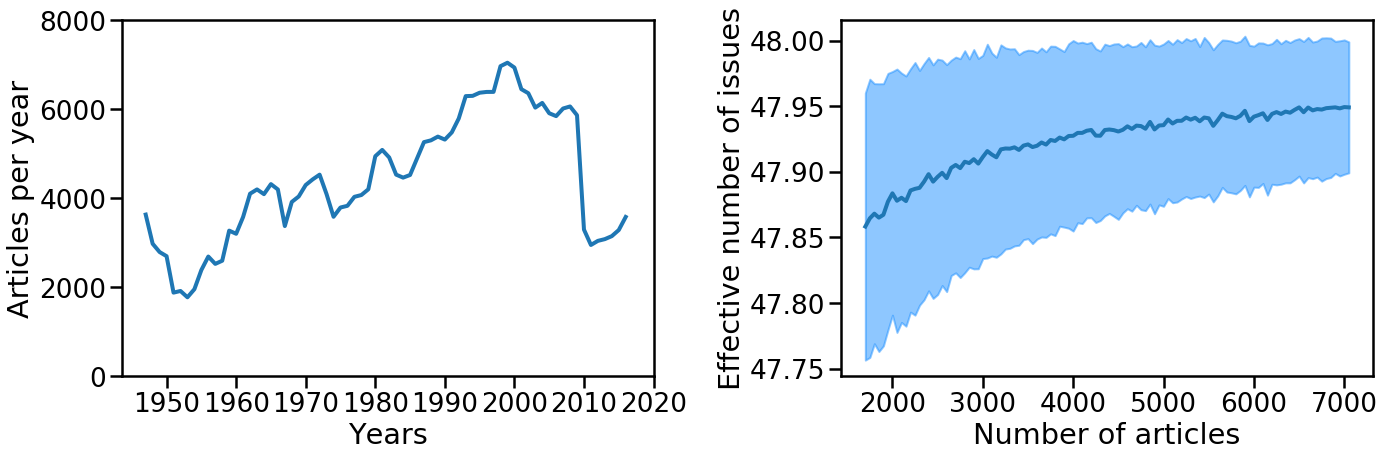

In [18]:
sns.set_context("poster", font_scale=1.2, rc={"lines.linewidth": 2.5})
fig, axs = plt.subplots(1,2, figsize=(20,7))

ax = axs[0]
df = df_alldocs.groupby(['year']).count()
df['filename'].plot(ax=ax, lw=4)
ax.set_ylim(0,8000)
xticks = np.arange(1950,2030,10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_ylabel('Articles per year')
ax.set_xlabel('Years')

ax = axs[1]
df = pd.read_csv('Null-model/null_eff_n_issues.csv', index_col=0)
y    = df['mean_eff_n_issues']
yerr = df['std_eff_n_issues']
x    = df['n_articles']
#ax.errorbar(x, y=y, yerr=yerr, fmt='o-', ecolor='orange', ms=5)
#ax.plot(x, y+yerr, '-', c='dodgerblue')
#ax.plot(x, y-yerr, '-', c='dodgerblue')
ax.plot(x, y,      '-', c='#1f77b4', lw=4)
ax.fill_between(x, y-yerr, y2=y+yerr, color='dodgerblue', alpha=0.5)

#x = df_alldocs.groupby(['year']).count()['filename'].values
#y = eff_n_topics_per_year
#ax.plot(x, y)

#ax.set_ylim(47.5,48.25)
plt.xlabel('Number of articles')
plt.ylabel('Effective number of issues')

plt.tight_layout()
#plt.savefig('images-paper/nullmodel-eff_n_issues.svg')
plt.show()

In [8]:
df = df_alldocs.copy()
df['year-week'] = [ str(r.year)+'-'+str(r.week).zfill(2) for _,r in df.iterrows() ]
df = df.groupby(['year-week']).count()

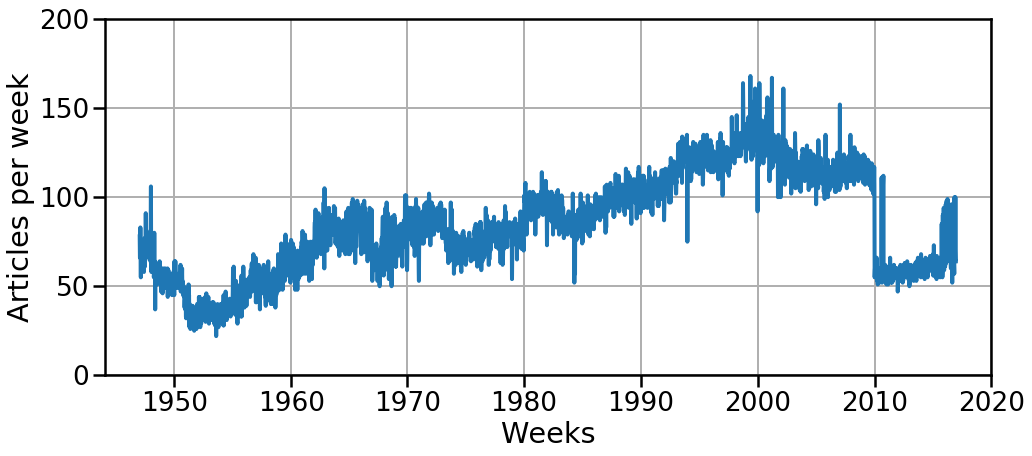

In [9]:
sns.set_context("poster", font_scale=1.2, rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots(figsize=(15,7))

df['filename'].plot(ax=ax, lw=4)
ax.set_ylabel('Articles per week')
ax.set_xlabel('Weeks')
xticks = [ np.where(df.index==(str(i)+'-01'))[0][0] for i in np.arange(1950,2020,10) ]
xticks += [ xticks[-1]+(xticks[-1]-xticks[-2])]
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(1950,2030,10))
ax.set_yticks(np.arange(0,225,50))
ax.set_ylim(0,200)
ax.grid()

ax.set_xlim(-min(xticks),max(xticks))

plt.tight_layout()
#plt.savefig('images-paper/n_articles_per_week.svg')
plt.show()

In [15]:
dates_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates_spiegel]
df2 = pd.read_csv('Null-model/null_eff_n_issues_small.csv', index_col=0)
eff_n_topics_per_date = [ 2**corrected_entropy(topics_per_date_spiegel[date]) for date in sorted_dates_spiegel ]

In [16]:
tot_articles_per_week_observed     = df['filename'].values
eff_articles_per_week_observed     = eff_n_topics_per_date
tot_articles_per_week_expected     = df2['n_articles']
eff_articles_per_week_expected     = df2['mean_eff_n_issues']
eff_articles_per_week_expected_err = df2['std_eff_n_issues']

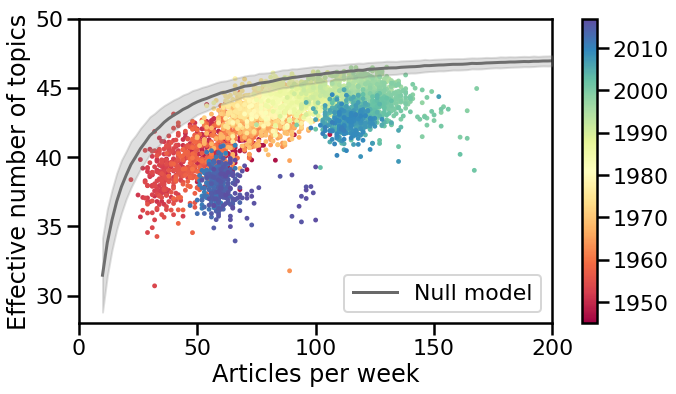

In [17]:
from datetime import datetime
sns.set_context("poster", font_scale=1.0, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(10,6))

# Line plot underneath
#ax.plot(tot_articles_per_week_observed, eff_articles_per_week_observed, '.-k', ms=5, zorder=1, lw=1)

color_range = [ d.year + d.timetuple().tm_yday*1.0/365 for d in dates_x ]

scatterplot = ax.scatter(tot_articles_per_week_observed,
                         eff_articles_per_week_observed,
                         s=8, alpha=1, c=color_range, cmap='Spectral',
                         vmin=1945,
                         #vmin=2008, vmax=2017,
                         zorder=2)

cbar = plt.colorbar(scatterplot, ax=ax)
#cbar.set_ticks(np.arange(1945,2020,10))

#cbar.set_ticklabels()
#cbar.set_label('Years', fontsize=20)


"""
ax.errorbar(x=tot_articles_per_week_expected,
            y=eff_articles_per_week_expected,
            yerr=eff_articles_per_week_expected_err,
            #fmt='o', ms=7, c='#ff7f0e') 
            fmt='o', ms=8, c='orange', markeredgecolor='w', zorder=3) 
"""

x = tot_articles_per_week_expected
y = eff_articles_per_week_expected
yerr = eff_articles_per_week_expected_err

linecolor = '#1f77b4'
fillcolor = 'dodgerblue'

linecolor = 'dimgrey'
fillcolor = 'grey'

ax.plot(x, y, '-', c=linecolor, lw=3, label='Null model')
ax.fill_between(x, y-yerr, y2=y+yerr, color=fillcolor, alpha=0.25, zorder=3)

ax.set_xlabel('Articles per week')
ax.set_ylabel('Effective number of topics')

ax.set_ylim(28,50)
ax.set_xlim(0,200)

plt.legend(loc=4)
#plt.savefig('images-paper/eff_n_issues_per_week.svg')
#plt.savefig('images-paper/eff_n_issues_per_week.png')
plt.tight_layout()
plt.show()

In [18]:
df = df_alldocs.copy()
df['year-week'] = [ str(r.year)+'-'+str(r.week).zfill(2) for _,r in df.iterrows() ]
df_articles_per_week = df.groupby(['year-week']).count()

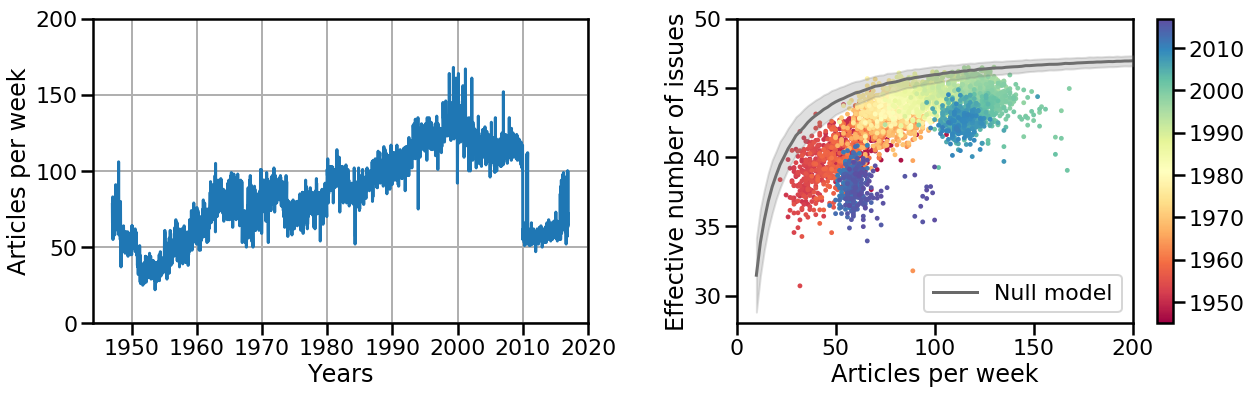

In [51]:
from datetime import datetime
sns.set_context("poster", font_scale=1.0, rc={"lines.linewidth": 2.5})

fig, axs = plt.subplots(1,2,figsize=(18,6))

ax = axs[0]

df_articles_per_week['filename'].plot(ax=ax, lw=3)

ax.set_ylabel('Articles per week')
ax.set_xlabel('Years')
xticks = [ np.where(df_articles_per_week.index==(str(i)+'-01'))[0][0] for i in np.arange(1950,2020,10) ]
xticks += [ xticks[-1]+(xticks[-1]-xticks[-2])]
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(1950,2030,10))
ax.set_yticks(np.arange(0,225,50))
ax.set_ylim(0,200)

ax.grid()
ax.set_xlim(-min(xticks),max(xticks))


ax = axs[1]
color_range = [ d.year + d.timetuple().tm_yday*1.0/365 for d in dates_x ]

# Line plot underneath
#ax.plot(tot_articles_per_week_observed, eff_articles_per_week_observed, '.-k', ms=5, zorder=1, lw=1)

scatterplot = ax.scatter(tot_articles_per_week_observed,
                         eff_articles_per_week_observed,
                         s=8, alpha=1, c=color_range, cmap='Spectral',
                         vmin=1945,
                         #vmin=2008, vmax=2017,
                         zorder=2)

cbar = plt.colorbar(scatterplot, ax=ax)
#cbar.set_ticks(np.arange(1945,2020,10))
#cbar.set_ticklabels()
#cbar.set_label('Years', fontsize=20)


"""
ax.errorbar(x=tot_articles_per_week_expected,
            y=eff_articles_per_week_expected,
            yerr=eff_articles_per_week_expected_err,
            #fmt='o', ms=7, c='#ff7f0e') 
            fmt='o', ms=8, c='orange', markeredgecolor='w', zorder=3) 
"""

x = tot_articles_per_week_expected
y = eff_articles_per_week_expected
yerr = eff_articles_per_week_expected_err

linecolor = '#1f77b4'
fillcolor = 'dodgerblue'

linecolor = 'dimgrey'
fillcolor = 'grey'

ax.plot(x, y, '-', c=linecolor, lw=3, label='Null model')
ax.fill_between(x, y-yerr, y2=y+yerr, color=fillcolor, alpha=0.25, zorder=3)

ax.set_xlabel('Articles per week')
ax.set_ylabel('Effective number of issues')

ax.set_ylim(28,50)
ax.set_xlim(0,200)

#axs[0].text(-800,210,'a', fontsize=28, fontweight='semibold')
#axs[1].text(-20, 51,'b', fontsize=28, fontweight='semibold')

plt.legend(loc=4)
plt.tight_layout()
plt.subplots_adjust(wspace=0.30)
plt.savefig('images-paper/SI-eff_n_issues_per_week.svg')
plt.show()